<h1>4 &nbsp; Método de Euler modificado  </h1>

&nbsp; Seja o problema de valor inicial (Lei de resfriamento de Newton):

$$\begin{cases} T'(t)=f(t,T)  \\ T_{0}= g(t_{0}) \end{cases}$$

&nbsp; O método de Euler modificado baseia-se em duas inclinações $k_{1}$ e $k_{2}$, onde a média aritmética dessas inclinações, $k$, é utilizada como inclinação para estimar o valor de $T_{1}$, partindo de um ponto $(t_{0},T_{0})$, onde:

<center>$k_{1}$ é a inclinação em $(t_{0},T_{0})$</center>
<center>$k_{2}$ é a inclinação em $(t_{1},T_{1})$</center>
<center>$k$ é a média aritmética entre $k_{1}$ e $k_{2}$</center>
<center>$T_{1}=T_{0}+h*k$ é a equação do método de Euler modificado</center>

&nbsp; Partindo de $k_{1}=f(t_{0},T_{0})$, podemos definir $T_{1}$ pelo método de Euler com passo $h$:

$$ T_{1}=T_{0}+h*k_{1}$$

&nbsp; E,

$$t_{1}=t_{0}+h$$

&nbsp; Dessa forma, $k_{2}$ pode ser escrito como:

$$k_{2}=f(t_{0}+h,T_{0}+h*k_{1})$$

&nbsp; De forma compacta, podemos escrever o método de Euler modificado como:

$$ t_{i+1} = t_{i} + h \:,\: T_{i+1}=T_{i}+\frac{h}{2}[f(t_{i},T_{i})+f(t_{i}+h,T_{i}+h*f(t_{i},T_{i}\:)\:)\:] $$

<h2>4.1 &nbsp; Método de Euler modificado - Pseudocódigo</h2>
<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">
<b>Entrada: A função $f(T)$, a condição inicial $(t_{0},T_{0})$, o passo $h$ e o vetor tempo $t$.</b><br>
    <b>Saída: os vetores $t$ e $T$ tais que $T_{i} \approx T(t_{i})$ .</b><br>
    <b>Início:</b>
    <ol>
  <li>$t\leftarrow  t_{inicial}:h:t_{final}$</li>
  <li>$T_{1}\leftarrow  80$</li>
  <li><b>para</b> t <b>faça</b></li>
  <li>|&nbsp;&nbsp;&nbsp;&nbsp;$T_{i+1} \leftarrow  T_{i}+(h/2)*f(T_{i}+h*f(T_{i}))$</li>
  <li>|&nbsp;&nbsp;&nbsp;&nbsp;$T \leftarrow T_{i+1}$</li>
  <li>fim</li>
  <li>retorna($t,T$)</li>
</ol> 
</div>

<h2>4.2 &nbsp; Método de Euler modificado - Implementação</h2>

&nbsp; Importando as bibliotecas NumPy e Matplotlib:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

&nbsp; Carregando o diretório <i><b>python/</b></i> que contém as funções escritas ao longo dos tópicos:

In [2]:
import sys 
sys.path.insert(0, '../python')

&nbsp; Construindo e salvando em <i><b>python/</b></i> a função <b><i>sol_euler_mod(&lt;vetor_tempo&gt;,&lt;condição_inicial&gt;)</i></b>, responsável por aplicar o método de Euler modificado num intervalo de tempo <b><i>vt</i></b>, dada a condição inicial <b><i>T0</i></b>:

In [3]:
%%writefile ../python/sol_euler_mod.py
#dependências
import numpy as np
from f import f

def sol_euler_mod(vt,T0):
    
    #Declarando vetor de temperaturas
    T = np.array([T0])
    
    #Obtendo passo de derivação (h)
    h = vt[2] - vt[1]

    #Aproximando T(i) pelo método de Euler modificado
    for t in vt:
        Ti = T[-1]+(h/2)*(f(T[-1])+f(T[-1]+h*f(T[-1])))
        T = np.append(T,Ti)
        
    return T[0:T.shape[0]-1]

Overwriting ../python/sol_euler_mod.py


&nbsp; Uma vez definido o método de Euler modificado, basta declarar o passo de derivação <b><i>h</i></b>, a condição inicial <b><i>T0</i></b>, o tempo inicial <b><i>ti</i></b>, o tempo final <b><i>tf</i></b> e o intervalo de tempo <b><i>vt</i></b>:

In [4]:
#Passo de derivação
h = 0.001

#Condição inicial
T0 = 80

#tempo inicial
ti = 0

#tempo final
tf = 60

#Intervalo de 0 à 60 minutos com passo h
vt = np.arange(ti,tf,h)

Importando a função <b><i>sol_euler_mod</i></b>:

In [5]:
from sol_euler_mod import sol_euler_mod

&nbsp; Atribuindo as variáveis aos parâmetros de <b><i>sol_euler_mod</i></b>:

In [6]:
T = sol_euler_mod(vt,T0)
print(T)
print('O vetor de temperaturas tem {} elementos'.format(T.shape[0]))

[80.         79.9940003  79.9880012  ... 20.14876976 20.14875488
 20.14874001]
O vetor de temperaturas tem 60000 elementos


&nbsp; Exibindo o gráfico <b>vt</b> $\times$ <b>T</b> 

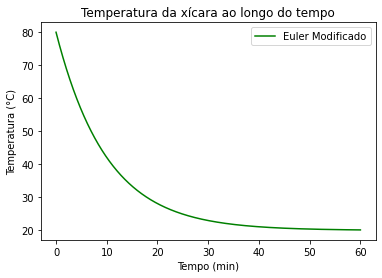

In [7]:
plt.plot(vt,T,'g',label='Euler Modificado')
plt.title('Temperatura da xícara ao longo do tempo')
plt.xlabel('Tempo (min)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

<h2>4.3 &nbsp; Estudo comparativo - Diferentes passos de derivação</h2>
&nbsp; Este tópico tem como objetivo estudar o comportamento da solução numérica para diferentes passos de derivação.
<br>
<br>
&nbsp; Construindo o vetor <b><i>passos</i></b> e o vetor <i><b>cores</b></i> da seguinte forma:
<center><i><b>passos(i)</b></i> $=$ <i><b>cores(i)</b></i>, $i=1,2,3,\dots$</center>

In [8]:
passos = np.array([4,2,1,0.1,0.01,0.001])
cores = np.array(['m','c','r','k','g','b'])
print(' |passos| = {} , |cores| = {}'.format(passos.shape[0],cores.shape[0]))

 |passos| = 6 , |cores| = 6


&nbsp; Dessa forma, escrevemos um <i>loop</i> para percorrer os elementos de <b><i>passos</i></b> e assim gerar diferentes soluções através da função <b><i>sol_euler</i></b>:

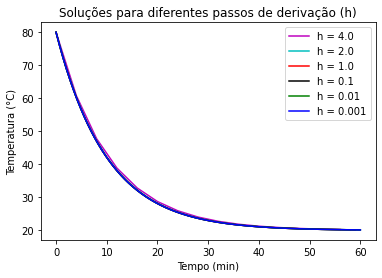

In [9]:
#Criando loop que percorre os elementos de passos
for passo in passos:
   
    #Criando vetor tempo
    vt = np.arange(ti,tf,passo)

    #Chamando a função sol_euler_mod 
    T = sol_euler_mod(vt,T0)
    
    #Grafico da curva    
    plt.plot(vt,T,'{}'.format(cores[np.where(passos==passo)[0][0]]),label='h = {}'.format(passo))

#Exibindo figura
plt.title('Soluções para diferentes passos de derivação (h)')
plt.xlabel('Tempo (min)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

&nbsp; Nota-se que pelo método de Euler modificado, as soluções para diferentes passos, são mais próximas entre si do que as soluções para os mesmos passos pelo método de Euler. 
<br>
&nbsp; Basta explicitar que as soluções não só estão mais próximas entre si, mas também estão mais próximas da solução analítica. &nbsp; Para isto, precisamos construir um gráfico contendo o erro cometido em cada passo em relação à solução analítica.
<br>
<br>
<h2>4.4&nbsp; Estudo comparativo - Soluções numéricas e analítica</h2>
&nbsp; Importando a função <i><b>f_erro(&lt;vetor_da_solução_analítica&gt;,&lt;vetor_da_solução_numérica&gt;)</b></i>:

In [10]:
from f_erro import f_erro

&nbsp; Neste momento, escrevemos um algoritmo similar ao <b>input [9]</b>, mas, ao invés de exibir o gráfico para diferentes passos de derivação, exibiremos o erro para estes passos.

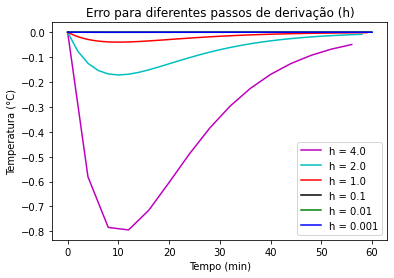

In [11]:
#Criando loop para diferentes passos de derivação
for passo in passos:
   
    #Criando vetor tempo 
    vt = np.arange(ti,tf,passo)
    
    #Chamando a função sol_euler_mod 
    T = sol_euler_mod(vt,T0)
    
    #Gerando solução analítica
    sol_analitica = 20+60*np.exp(-0.1*vt)
    
    #Chamando a função erro
    err = f_erro(sol_analitica,T)
    
    #Grafico da curva    
    plt.plot(vt,err,'{}'.format(cores[np.where(passos==passo)[0][0]]),label='h = {}'.format(passo))
    
#Exibindo figura
plt.title('Erro para diferentes passos de derivação (h)')
plt.xlabel('Tempo (min)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

&nbsp; Nota-se que a medida em que o passo de derivação diminui, o erro entre a solução numérica e analítica se aproxima de zero. 
&nbsp; Desta forma, concluímos que para obter uma solução numérica aceitável pelo método de Euler modificado, devemos tomar um passo de derivação próximo de 0. &nbsp; Além disso, para todos os passos utilizados, a solução numérica é maior que a solução analítica, fazendo oposição ao método de Euler.

<h2>4.5 &nbsp; Obtendo o maior passo de derivação para produzir uma aproximação aceitável</h2>

&nbsp; Uma solução com erro máximo menor que <b>0.4</b> é uma aproximação aceitável para este problema, dada a escala, este valor será o limite superior <i><b>limite_sup</b></i> para o erro máximo:

In [12]:
limite_sup = 0.4

&nbsp; Declaramos o passo de derivação inicial valendo 3, uma vez que estamos trabalhando com um método numérico que converge rapidamente:

In [13]:
passo = 3

&nbsp; Além disso, precisamos, convenientemente, definir o decréscimo do passo de derivação, de forma que o passo de derivação tenda a zero:

In [14]:
decrescimo = 0.01

&nbsp; Além disso, vamos criar uma matriz com finalidade de armazenar o passo atual bem como seu respectivo erro máximo.

In [15]:
dados = [[0, 0]]

&nbsp; Continuando, escrevemos um <i>loop</i> de forma que o passo de derivação seja reduzido até que o erro máximo entre a solução numérica e analítica seja menor que o limite superior.
<br>
<b>&nbsp; Atenção:</b> Devemos tomar os valores absolutos  dos elementos do vetor erro <b>abs(erro[])</b>:

In [16]:
#variável auxiliar
err = np.array([T0])

while np.amax(abs(err)) > limite_sup:
    
    #Criando vetor tempo 
    vt = np.arange(ti,tf,passo)
    
    #Chamando a função sol_euler_mod 
    T = sol_euler_mod(vt,T0)
    
    #Gerando solução analítica
    sol_analitica = 20+60*np.exp(-0.1*vt)
    
    #Chamando a função erro
    err = f_erro(sol_analitica,T)
    
    #Adicionando linhas à matriz (tabela)
    dados = np.vstack([dados,[round(passo, 2),np.amax(abs(err))]])
    
    #Realizando decrescimo do passo de derivação
    passo = passo - decrescimo

&nbsp; Finalmente, exibimos os dados armazenados:

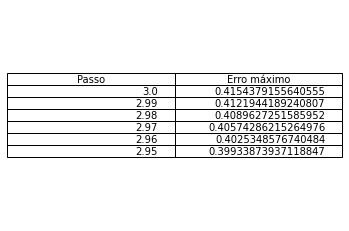

Última linha: [2.95       0.39933874]


In [17]:
#remove a primeira linha da matriz
dados = np.delete(dados, 0, 0)

#Exibindo tabela
fig, ax =plt.subplots(1,1)
column_labels=['Passo', 'Erro máximo']
ax.axis('tight')
ax.axis('off')
ax.table(cellText=dados,colLabels=column_labels,loc='center')

plt.show()

print('Última linha: {}'.format(dados[dados.shape[0]-1]))

&nbsp; Conforme a tabela gerada pelo <b>Input [17]</b>, o passo de derivação que devemos utilizar para produzirmos uma simulação com erro máximo menor que <b>0.4</b>, sob as condições descritas ao longo deste tópico, é de <b>2.95</b>.